In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [10]:
data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)






data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")
data_train = data_train.sample(frac=1).reset_index(drop=True)

data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)


In [11]:
# label_encoder = LabelEncoder()
# data_train['label'] = label_encoder.fit_transform(data_train['label'])
# data_test['label']=label_encoder.transform(data_test['label'])
# data_val['label']=label_encoder.transform(data_val['label'])





In [12]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,fake,-332.774414,38.816891,-20.988266,-14.083306,-29.379539,-34.550629,-23.207100,-14.677548,-10.898650,...,-12.015373,-8.785952,-6.513914,-1.564019,-2.093359,-2.346364,3.441715,-1.747258,1.450292,-1.714880
1,fake,-290.422363,50.421009,-13.387678,-13.178273,-28.993156,-42.133152,-33.384457,-12.185462,-10.471134,...,-15.203990,-11.710615,-5.334319,1.242666,-2.135225,-2.663771,4.580714,1.080979,-0.406633,-3.191322
2,fake,-312.925476,28.324167,-11.506178,-5.013806,-27.155266,-35.197243,-30.756533,-9.623538,-9.301911,...,-11.629334,-7.327210,-4.413151,-1.749547,1.636487,-0.468816,2.938633,-0.943503,1.804445,-2.930009
3,real,-309.723694,36.023430,-8.851470,-10.887238,-34.490696,-37.358418,-29.019012,-14.412217,-11.581546,...,-13.060099,-12.514336,-6.074494,-0.968358,-0.306008,-1.645939,2.175397,-0.297927,3.436875,-1.974241
4,fake,-304.952118,34.255306,-23.783596,-23.431103,-38.298412,-33.179882,-29.101000,-6.251589,-10.308779,...,-6.840042,-8.349902,1.706556,2.403383,-0.156079,-2.337055,-2.496037,-5.691125,-2.003829,-2.640263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-316.624146,58.353016,-21.113411,-16.434038,-48.548519,-43.845230,-18.041872,-16.169388,-18.124426,...,-13.382565,-6.858551,-7.739892,0.058139,-0.693893,-2.406862,-0.189357,-3.560297,-4.108626,-1.332990
117889,fake,-309.708466,45.472351,-8.602859,-3.478863,-33.049355,-46.016876,-20.897230,-14.607799,-15.970032,...,-17.265993,-9.974726,-8.052746,0.378011,-3.568387,-4.174604,1.199627,0.821614,-2.358495,-2.561546
117890,fake,-313.905945,36.498356,-12.373092,-36.079910,-41.465897,-33.359562,-9.976475,-8.058924,-20.997351,...,-14.490765,-4.700496,-2.648075,1.024620,-4.327476,-5.041059,-0.018085,2.545904,1.826446,-0.804381
117891,real,-314.539215,34.980206,-16.232985,-18.696329,-34.364571,-32.388412,-20.609177,-15.101743,-17.721251,...,-12.025502,-8.963167,-4.356269,-0.241480,1.114384,-2.957095,2.110303,-1.734089,-0.499962,-0.599371


In [13]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [14]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels
y_train = pd.get_dummies(y_train)

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels
y_val = pd.get_dummies(y_val)



X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels
y_test = pd.get_dummies(y_test)


In [15]:
import tensorflow as tf
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
1843/1843 [==============================] - 14s 7ms/step - loss: 0.2938 - accuracy: 0.9110 - val_loss: 0.2734 - val_accuracy: 0.9111
Epoch 2/100
1843/1843 [==============================] - 11s 6ms/step - loss: 0.2661 - accuracy: 0.9113 - val_loss: 0.2511 - val_accuracy: 0.9114
Epoch 3/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.2499 - accuracy: 0.9128 - val_loss: 0.2439 - val_accuracy: 0.9131
Epoch 4/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.2395 - accuracy: 0.9149 - val_loss: 0.2365 - val_accuracy: 0.9142
Epoch 5/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.2329 - accuracy: 0.9165 - val_loss: 0.2285 - val_accuracy: 0.9169
Epoch 6/100
1843/1843 [==============================] - 11s 6ms/step - loss: 0.2274 - accuracy: 0.9170 - val_loss: 0.2305 - val_accuracy: 0.9155
Epoch 7/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.2231 - accuracy: 0.9183 - val_loss: 0.2248 -

In [16]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.6051 - accuracy: 0.8958 - 2s/epoch - 4ms/step
Test Accuracy: 89.58%


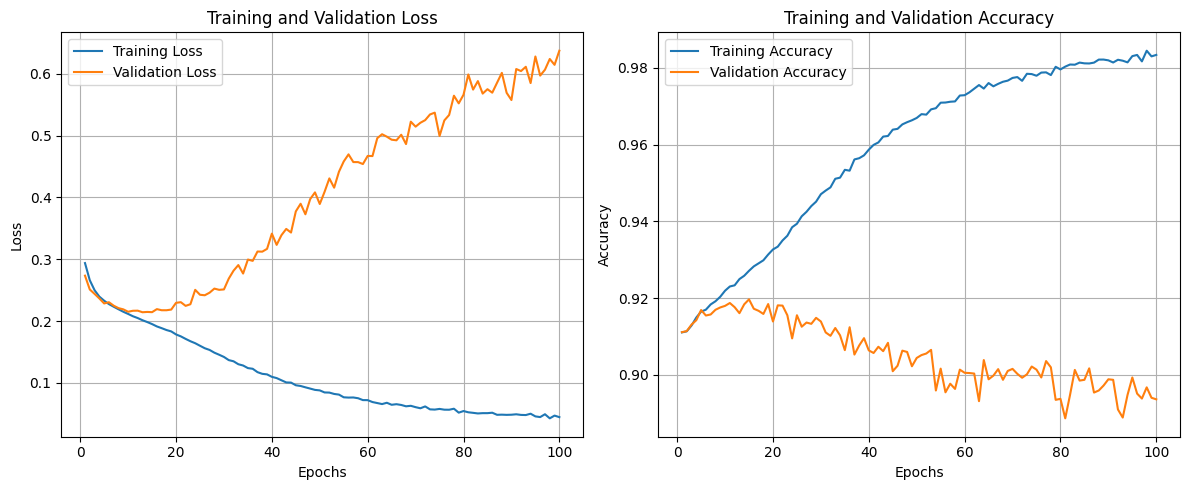

In [17]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 2ms/step
Test f1_score : 35.46%


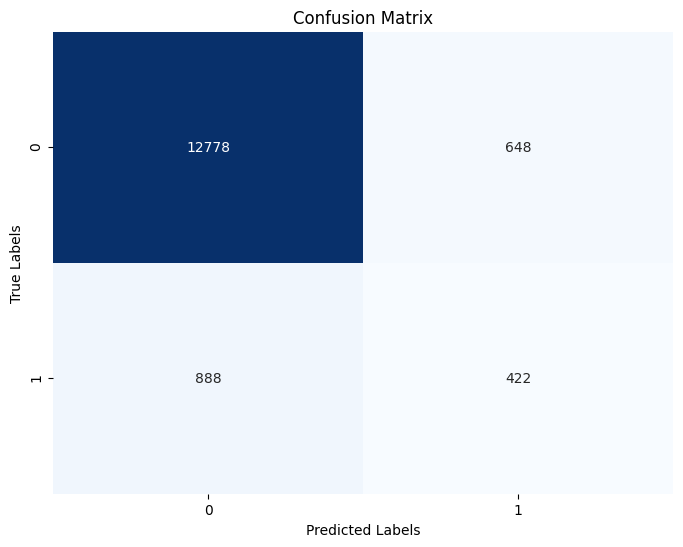

In [18]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,1,0
14734,1,0


# eraly stopping

In [21]:
import tensorflow as tf
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/100
1843/1843 [==============================] - 13s 6ms/step - loss: 0.2909 - accuracy: 0.9107 - val_loss: 0.2721 - val_accuracy: 0.9111
Epoch 2/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.2637 - accuracy: 0.9113 - val_loss: 0.2521 - val_accuracy: 0.9115
Epoch 3/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.2494 - accuracy: 0.9123 - val_loss: 0.2436 - val_accuracy: 0.9133
Epoch 4/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.2416 - accuracy: 0.9142 - val_loss: 0.2419 - val_accuracy: 0.9132
Epoch 5/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.2341 - accuracy: 0.9161 - val_loss: 0.2400 - val_accuracy: 0.9114
Epoch 6/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.2291 - accuracy: 0.9167 - val_loss: 0.2290 - val_accuracy: 0.9159
Epoch 7/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.2240 - accuracy: 0.9178 - val_loss: 0.2314 -

In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.2717 - accuracy: 0.9128 - 2s/epoch - 4ms/step
Test Accuracy: 91.28%


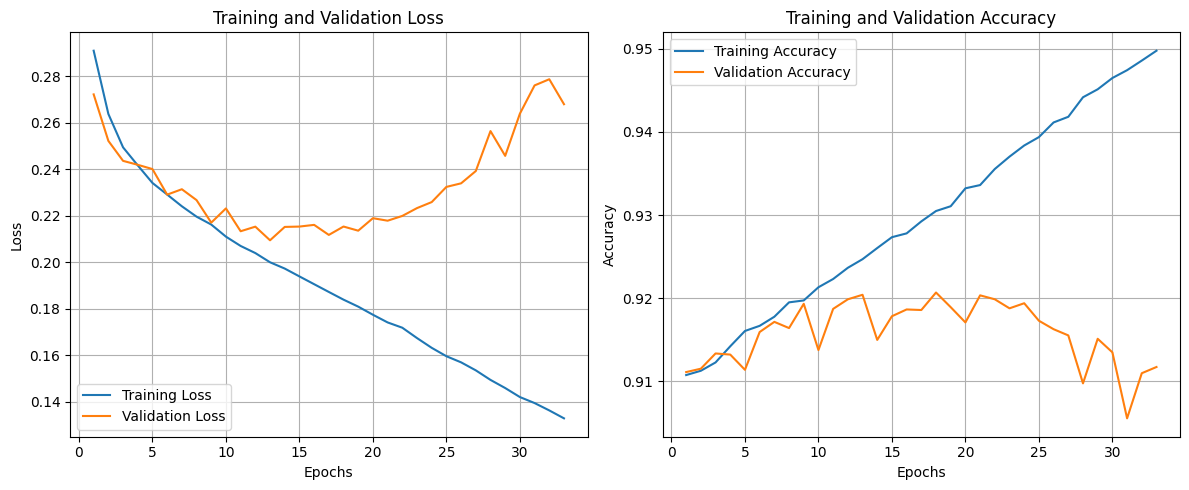

In [23]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 2ms/step
Test f1_score : 40.20%


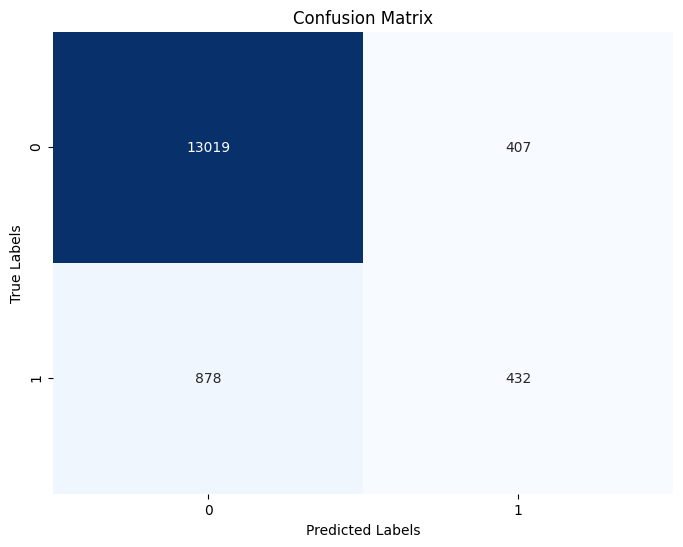

In [24]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()